**importing dependancies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

**Data loading**

In [3]:
import zipfile
import os

zip_path = "/content/archive.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Zip file extracted to {extract_path}")

Zip file extracted to /content/


In [4]:
df=pd.read_csv("/content/train.csv")
display(df.head())

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.shape

(800, 22)

In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
# convert age column to integer
df["age"].astype(int)

,age
0,38
1,47
2,7
3,23
4,43
...,...
795,16
796,20
797,5
798,16


In [10]:
for col in df.columns:
  numerical_features =["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [11]:
# dropping TD & age_desc column
df = df.drop(columns=["ID","age_desc"])

In [12]:
df.shape

(800, 20)

In [13]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [15]:
# define the mapping dictionary for country names
mapping = {
    'Viet Nam': 'Vietnam',
    'AmericanSamoa': 'United States',
    'Hong Kong': 'China'
}

# replace the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [16]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [17]:
# target class distributions
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights**
1. missing values ion ethnicity & relation
2. age_desc column has only 1 unique value . so it removed as it not important for prediction
3. fix the country names
4. identified class imbalance in the target column

**Exploratory Data Analysis (EDA)**

In [18]:
df.shape

(800, 20)

In [19]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [20]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,Self,0


In [21]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


**Univariate Analysis**

Numarical Columns:
.age
.result

In [22]:
# set the desired theme
sns.set_theme(style="darkgrid")

**Distribution Plots**

Mean Age: 28.452117626575
Median Age: 24.848350449999998


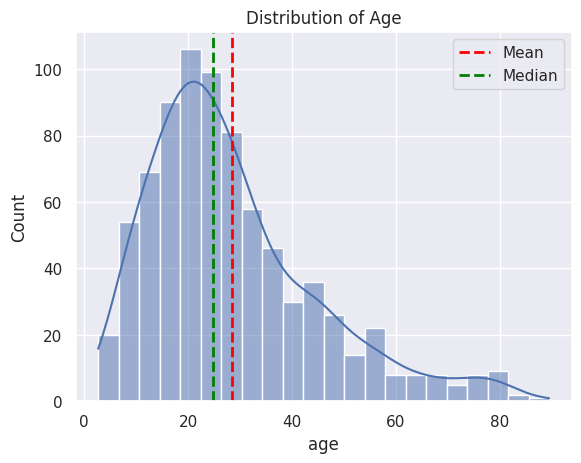

In [23]:
# Histogram for "age"

sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")

#calculate the mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean Age:", age_mean)
print("Median Age:", age_median)

#add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(age_median, color="green", linestyle="dashed", linewidth=2, label="Median")

# Add mean and median values to the plot
plt.legend()
plt.show()

Mean Result: 8.537303106501248
Median Result: 9.605299308


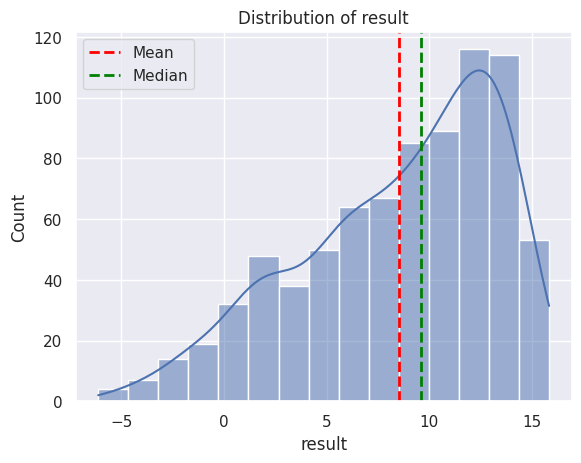

In [24]:
# Histogram for "age"

sns.histplot(df["result"],kde=True)
plt.title("Distribution of result")

#calculate the mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean Result:", result_mean)
print("Median Result:", result_median)

#add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(result_median, color="green", linestyle="dashed", linewidth=2, label="Median")

# Add mean and median values to the plot
plt.legend()
plt.show()

**Box plotes identifying outliers in the numerical columns**

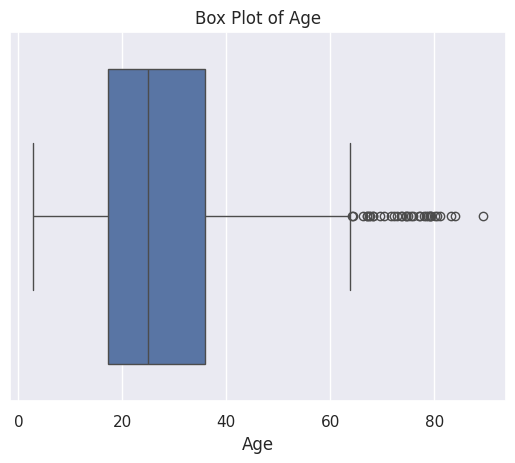

In [25]:
# Box plots

sns.boxplot(x=df["age"])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

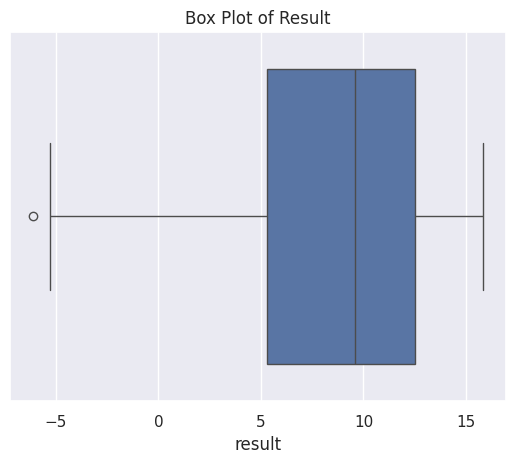

In [26]:
# Box plots

sns.boxplot(x=df["result"])
plt.title("Box Plot of Result")
plt.xlabel("result")
plt.show()

In [27]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("Number of outliers in age:", len(age_outliers))

Number of outliers in age: 35


In [28]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
print("Number of outliers in result:", len(result_outliers))

Number of outliers in result: 1


**Univeriate analysis forthe categorical columns**

In [29]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

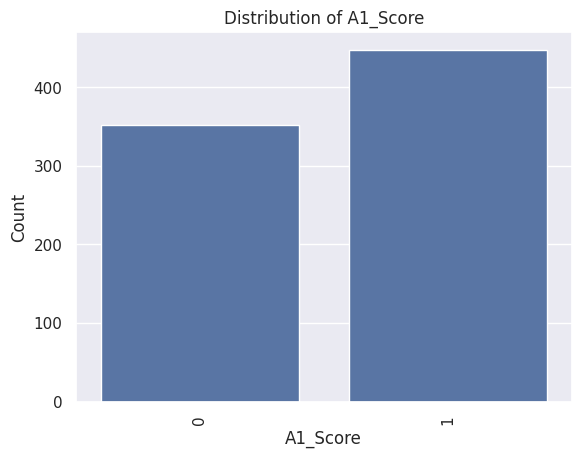

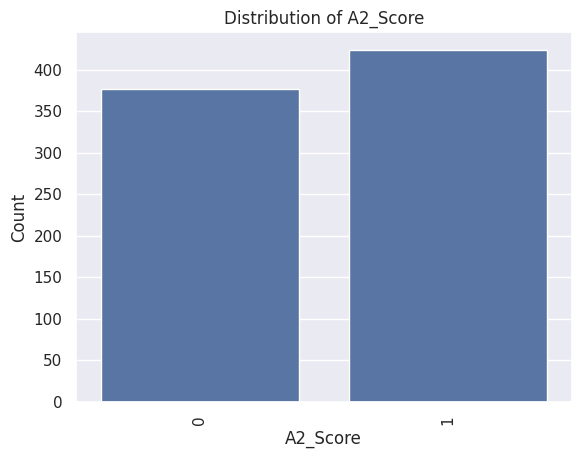

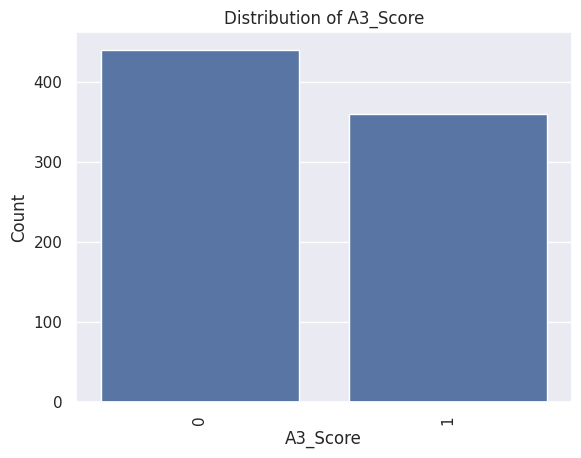

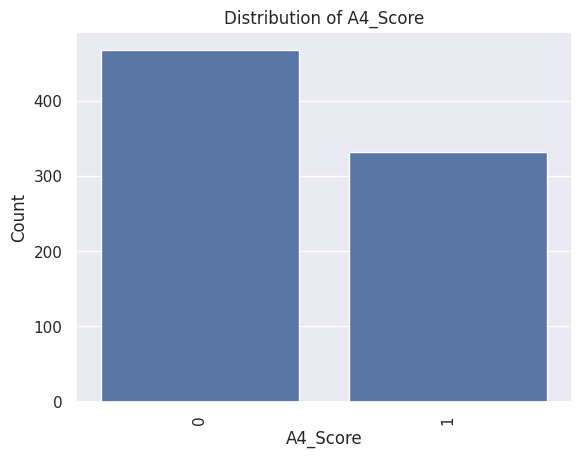

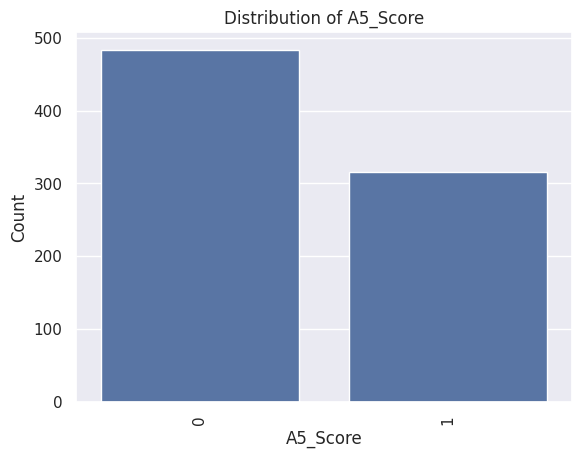

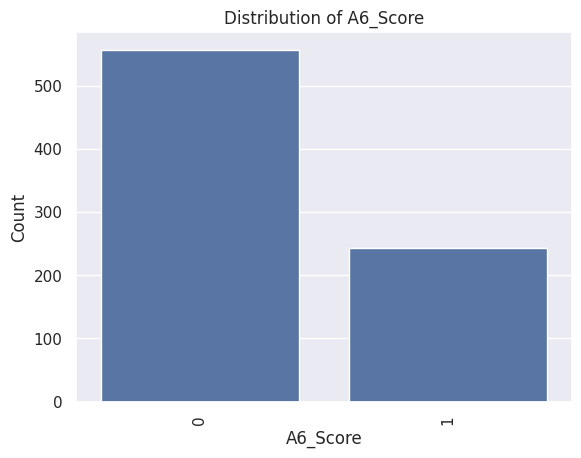

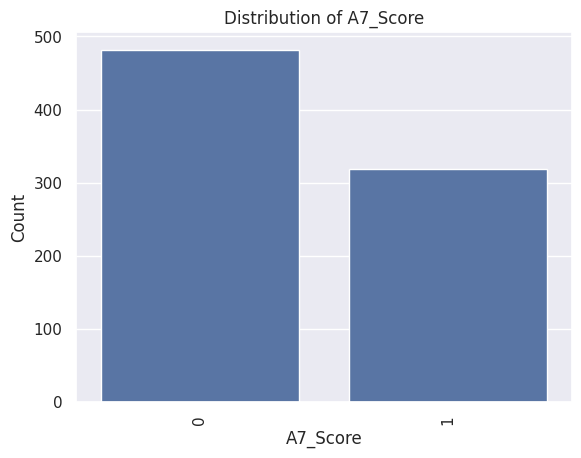

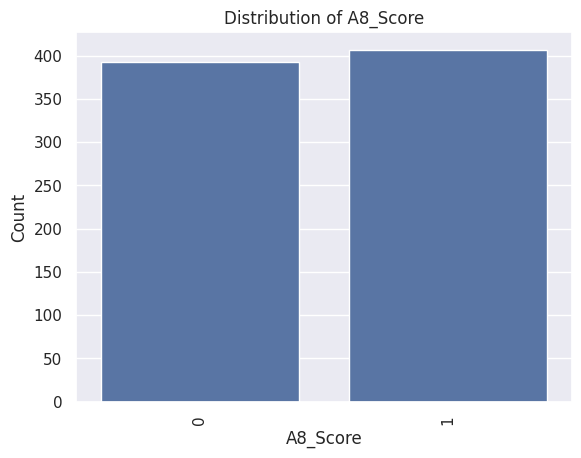

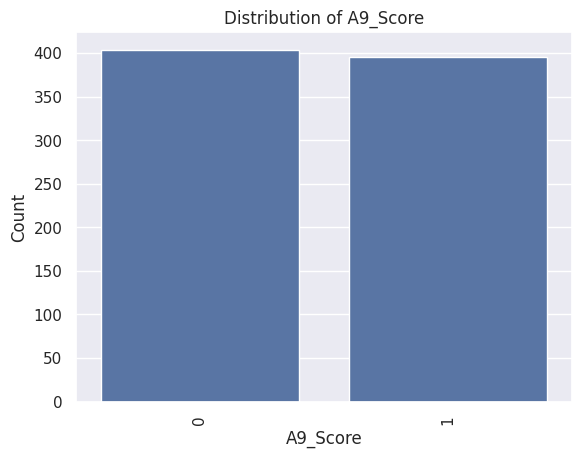

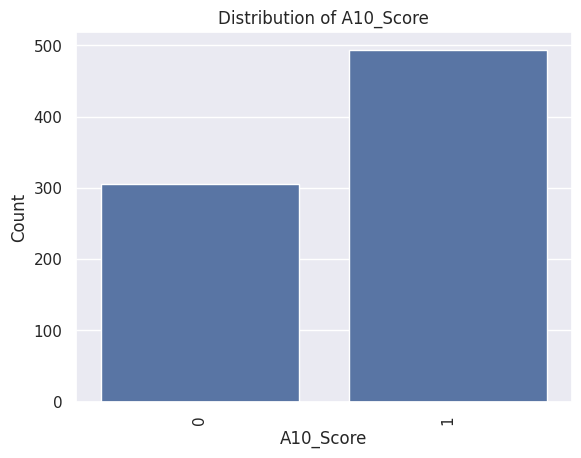

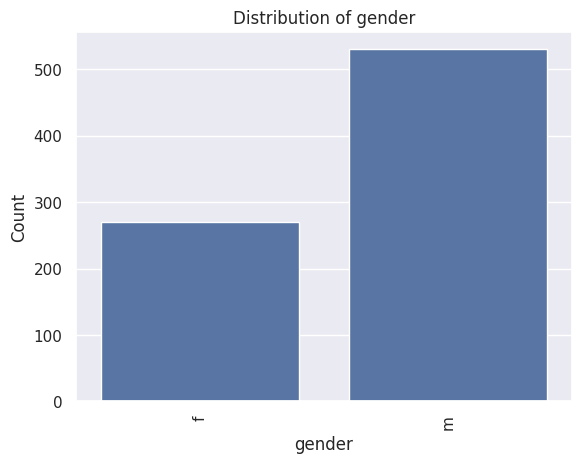

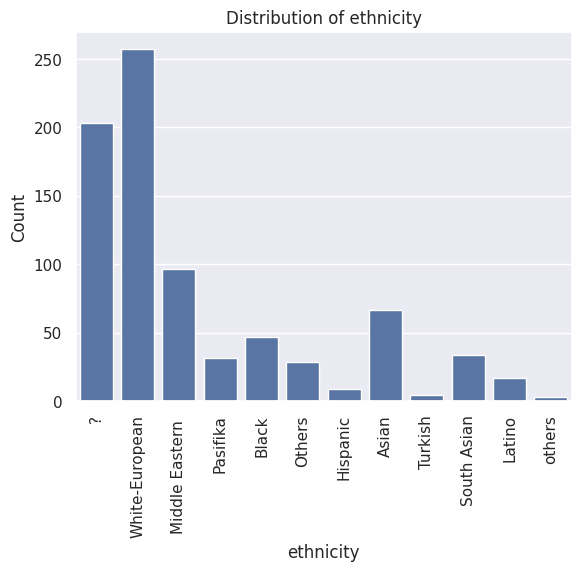

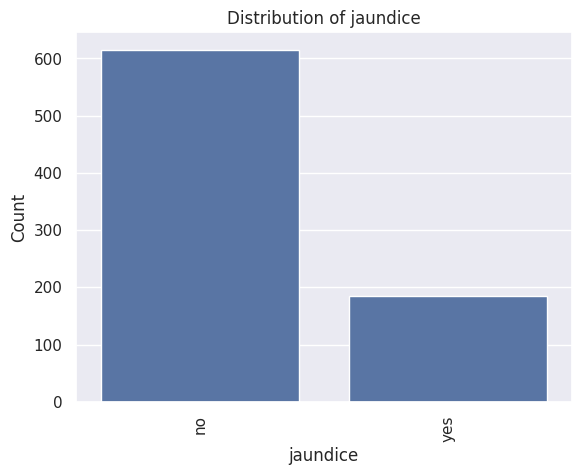

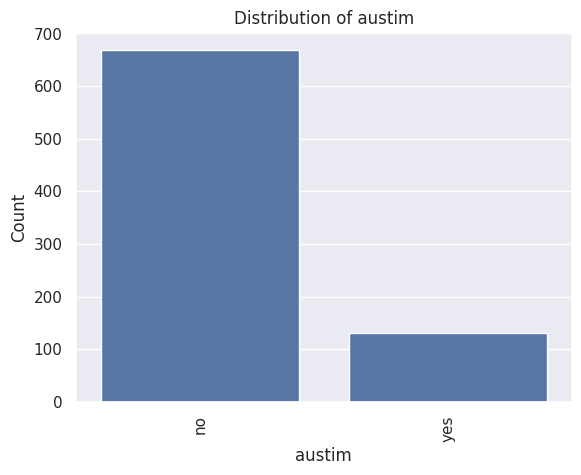

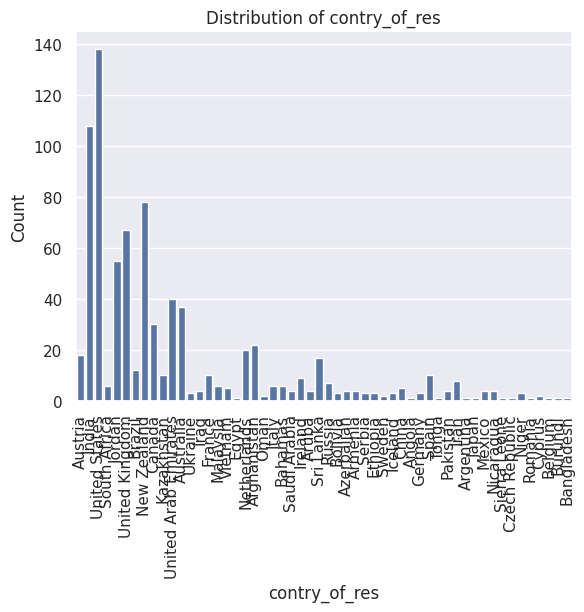

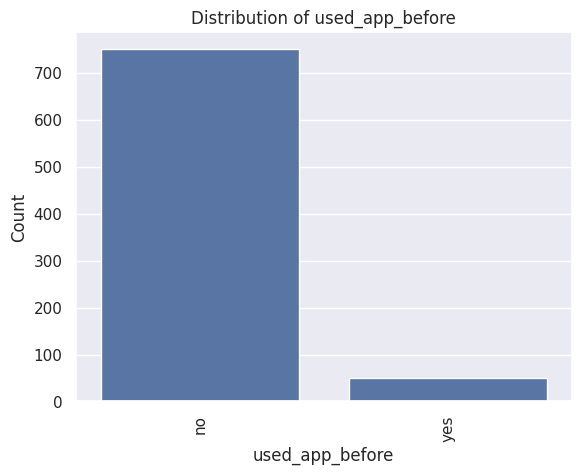

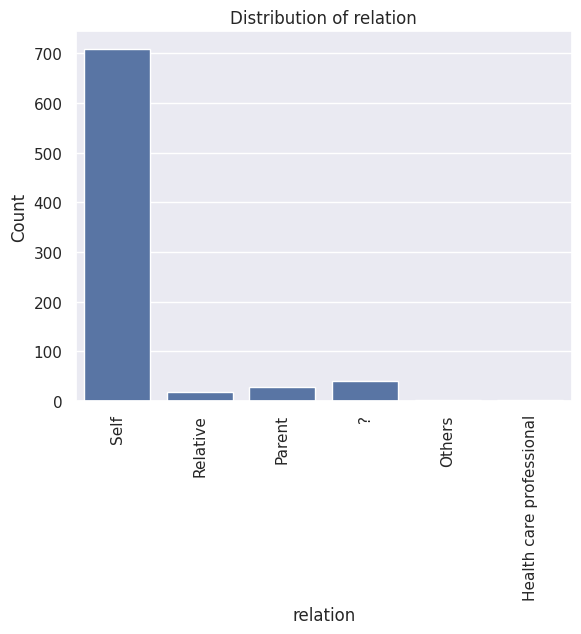

In [30]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

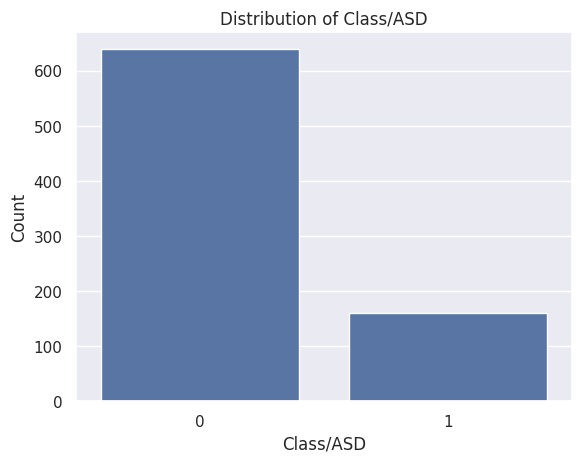

In [31]:
# countplot for dataset column(Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Distribution of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [32]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Handles missing value ethnicity and relation column**

In [33]:
df["ethnicity"]=df["ethnicity"].replace({"?":"Others","others":"Others"})

In [34]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [35]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [36]:
df["relations"]=df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional": "others"}
)

In [37]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [38]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,relations
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,no,6.351166,Self,0,Self
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,no,2.255185,Self,0,Self
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,Self,1,Self
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,no,2.276617,Self,0,Self
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,no,-4.777286,Self,0,Self


**Label Encodeing**

In [39]:
# identify columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

In [40]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation', 'relations'],
      dtype='object')


In [41]:
#initialize a dictionary to store the encoders
encoders ={}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoders = LabelEncoder()
  df[column] = label_encoders.fit_transform(df[column])
  encoders[column] = label_encoders


  # save the encoders as a pickle file
  with open("encoders.pk1","wb") as f:
    pickle.dump(encoders,f)

In [42]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder(),
 'relations': LabelEncoder()}

In [43]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,relations
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,5,0,1
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,5,0,1
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,5,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,52,0,2.276617,5,0,1
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,5,0,1


**Biveriate Analysis**

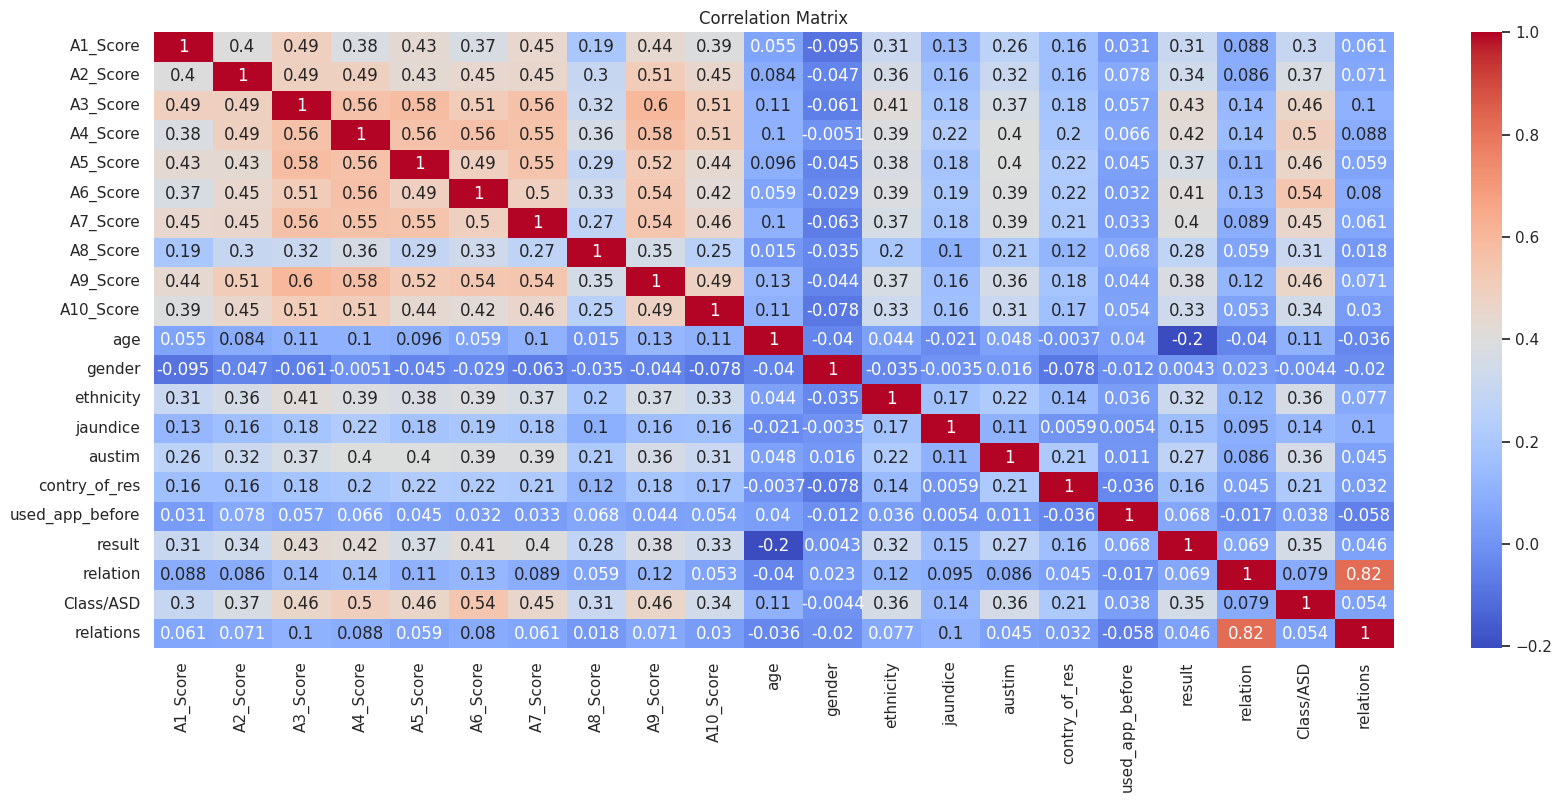

In [44]:
# correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Insight from EDA**
- There are few outliers in the numarical columns(age, results)
-There is a class imbalance in the target column
-there is a class imbalance in the categorica features
-we don't have any highly correlated column
-performed label encoding and saved the encoders

**Data preprocessing**

**Handling the outliers**

In [45]:
# function to replace the utliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    median = df[column].median()

    #replace outliers with median value
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df


In [46]:
# replace the outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace the outliers in ther "result" column
df = replace_outliers_with_median(df, "result")

In [47]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,relations
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,5,0,1
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,5,0,1
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,5,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,52,0,2.276617,5,0,1
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,5,0,1


In [48]:
df.shape

(800, 21)

**Train Test Spilit**

In [49]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD', 'relations'],
      dtype='object')

In [50]:
x=df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [51]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score        age  gender  ethnicity  jaundice 

In [52]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [55]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


**SMOTE(Synthetic Minority Oversampling technique )**

In [56]:
SMOTE = SMOTE(random_state=42)
x_train_resampled,y_train_resampled = SMOTE.fit_resample(x_train,y_train)

In [57]:
print(y_train_resampled.shape)

(1030,)


In [58]:
print(y_train_resampled.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


**model training**

In [59]:
# list of classifiers
models={
    "Desion Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}


In [60]:
# dictionary to store the cross validation results
cv_scores = {}
# perform 5 fold validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters....")
  scores = cross_val_score(model,x_train_resampled,y_train_resampled,cv=5,scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation Accuracy :{np.mean(scores):.2f}")
  print("-"*50)

Training Desion Tree with default parameters....
Desion Tree cross-validation Accuracy :0.87
--------------------------------------------------
Training Random Forest with default parameters....
Random Forest cross-validation Accuracy :0.91
--------------------------------------------------
Training XGBoost with default parameters....
XGBoost cross-validation Accuracy :0.90
--------------------------------------------------


In [61]:
cv_scores

{'Desion Tree': array([0.83495146, 0.86893204, 0.88349515, 0.86407767, 0.87864078]),
 'Random Forest': array([0.87378641, 0.9368932 , 0.9223301 , 0.9223301 , 0.90291262]),
 'XGBoost': array([0.88834951, 0.92718447, 0.90776699, 0.91262136, 0.88349515])}

model selection & hyperparameter tuning

In [66]:
#initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)


In [64]:
#hyperparameter grids for randomizesearcCV

param_grid_dt = {
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf = {
    "n_estimators" :[50,100,200,500],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb = {
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree": [0.5,0.7,1.0]

}

In [67]:
# hyper parameter tuning for 3 tree based models

#the below steps can be automated by using a for loop or by using a pipeline

# perform RndamizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring="accuracy",random_state=42)


In [68]:
# fit the models
random_search_dt.fit(x_train_resampled,y_train_resampled)
random_search_rf.fit(x_train_resampled,y_train_resampled)
random_search_xgb.fit(x_train_resampled,y_train_resampled)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [69]:
print(random_search_dt.best_params_)
print(random_search_rf.best_params_)
print(random_search_xgb.best_params_)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 70, 'criterion': 'gini'}
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [70]:
print(random_search_dt.best_score_)
print(random_search_rf.best_score_)
print(random_search_xgb.best_score_)

print(random_search_dt.best_estimator_)
print(random_search_rf.best_estimator_)
print(random_search_xgb.best_estimator_)

0.8660194174757281
0.9145631067961165
0.9126213592233011
DecisionTreeClassifier(max_depth=70, random_state=42)
RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)


In [71]:
# get the model with best score

best_model = None
best_score = 0

if random_search_rf.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

  if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

    if random_search_xgb.best_score_ > best_score:
      best_score = random_search_xgb.best_score_
      best_model = random_search_xgb.best_estimator_

In [72]:
print(f"Best_Model:{best_model}")
print(f"Best Cross-Validation Accuracy:{best_score:.2f}")

Best_Model:RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)
Best Cross-Validation Accuracy:0.91


In [73]:
#save the Best model
with open ("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

**Evaluation**

In [76]:
# evaluation on test data
y_test_pred = best_model.predict(x_test)
print("Accuracy_Score :",accuracy_score(y_test,y_test_pred))
print("Confusion_Matrix :",confusion_matrix(y_test,y_test_pred))
print("Classification_Report",classification_report(y_test,y_test_pred))

Accuracy_Score : 0.84375
Confusion_Matrix : [[107  17]
 [  8  28]]
Classification_Report               precision    recall  f1-score   support

           0       0.93      0.86      0.90       124
           1       0.62      0.78      0.69        36

    accuracy                           0.84       160
   macro avg       0.78      0.82      0.79       160
weighted avg       0.86      0.84      0.85       160

